In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-03-03 / Aki Taanila


# Korrelaatiokerroin ja hajontakaavio

Määrällisten muuttujien välisiä riippuvuuksia selvitellään korrelaatiokertoimien ja hajontakaavioiden avulla.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pairplotin ja jointplotin näkyvyydessä voi esiintyä ongelmia ilman seuraavaa
%matplotlib inline

# Korrelaation merkitsevyyden testaukseen
from scipy.stats import pearsonr 

sns.set_style('whitegrid')

In [3]:
# Data, jossa yritysasiakkaiden mielikuvia tavarantoimittajayrityksestä
# Mielikuvien asteikko: 0 = huono - 10 = erinomainen
df = pd.read_excel('https://taanila.fi/data3.xlsx')
df

,nro,toimitusnopeus,hintataso,joustavuus hinnoissa,toimittajan imago,palvelu,myyntihenkilöstön imago,tuotteiden laatu,yleinen tyytyväisyys
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8
...,...,...,...,...,...,...,...,...,...
95,96,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4
96,97,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2
97,98,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7
98,99,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3


In [4]:
# Pudotan nro-sarakkeen pois
df = df.drop('nro', axis=1)

## Korrelaatiokerroin

Korrelaatiokerroin on tunnusluku, joka mittaa kahden muuttujan välistä riippuvuutta. Korrelaatiokerroin voi saada arvoja väliltä -1 - +1. Riippuvuus on sitä voimakkaampaa mitä kauempana korrelaatiokertoimen arvo on nollasta.

Lisätietoa korrelaatiosta https://tilastoapu.wordpress.com/korrelaatio/

In [5]:
# Korrelaatiokertoimet osatekijöiden ja yleisen tyytyväisyyden välillä
df.corr()['yleinen tyytyväisyys']

toimitusnopeus             0.650632
hintataso                  0.028395
joustavuus hinnoissa       0.524814
toimittajan imago          0.475934
palvelu                    0.631233
myyntihenkilöstön imago    0.340909
tuotteiden laatu          -0.283340
yleinen tyytyväisyys       1.000000
Name: yleinen tyytyväisyys, dtype: float64

Yllä kaikkein voimakkain korrelaatio (0.65) on toimitusnopeuden ja yleisen tyytyväisyyden välillä. Heikointa korrelaatio (0.03) on hintatason ja yleisen tyytyväisyyden välillä.

## Hajontakaavio

Hajontakaaviosta voin silmämäärin arvoida riippuvuuden voimakkuutta.

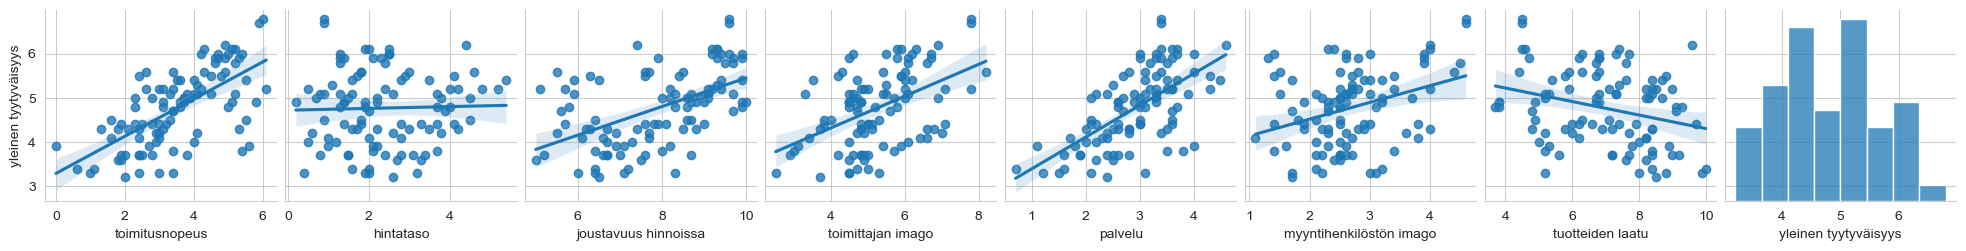

In [6]:
# kind-parametrin arvo 'reg' lisää mukaan trendiviivat
sns.pairplot(df, y_vars='yleinen tyytyväisyys', kind='reg')

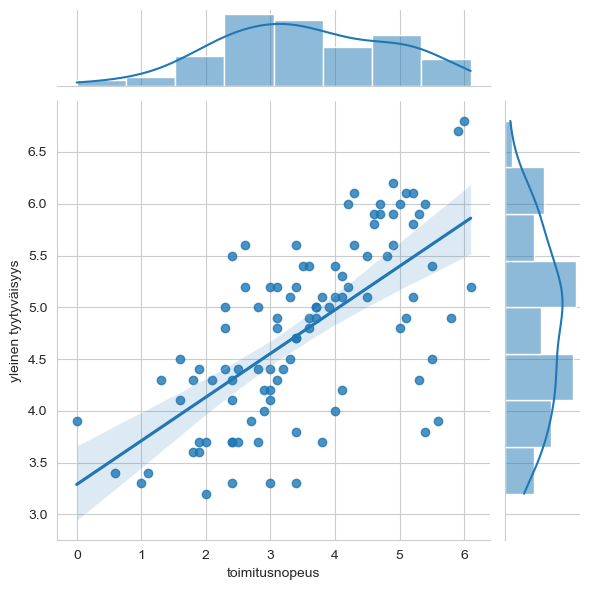

In [7]:
# Yksittäisen muuttujaparin tarkastelu hajontakaaviona
sns.jointplot(data=df, x='toimitusnopeus', y='yleinen tyytyväisyys', kind='reg')

## Ovatko korrelaatiokertoimet tilastollisesti merkitseviä?

Otoksessa havaitut korrelaatiokertoimet voivat olla liian lähellä nollaa, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama korrelaatio.

Korrelaatiokerrointa sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Korrelaatiokertoimen merkitsevyyttä voit testata laskemalla niin kutsuttu **p-arvo**. Mitä pienempi p-arvo, sitä merkitsevämpi korrelaatio. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä korrelaatiosta.

Korrelaatiokertoimeen liittyvän p-arvon voit laskea siihen tarkoitetulla testillä (**pearsonr**).

Jos tarkasteltavissa muuttujissa on tekstimuotoisia muuttujia tai jos muuttujat sisältävät puuttuvia arvoja, niin korrelaatiokertoimeen liittyvän p-arvon laskenta ei onnistu. Poista tekstimuotoiset muuttujat ja puuttuvia arvoja sisältävät rivit ennen pearsonr-funktion käyttöä.


In [8]:
for muuttuja in df:
    # poistetaan puuttuvia arvoja sisältävät rivit
    df_dropna = df.dropna(subset=[muuttuja, 'yleinen tyytyväisyys'])
    print(muuttuja, pearsonr(df_dropna['yleinen tyytyväisyys'], df_dropna[muuttuja]))    

toimitusnopeus PearsonRResult(statistic=0.6506323301389191, pvalue=2.354357209803324e-13)
hintataso PearsonRResult(statistic=0.028394665880510234, pvalue=0.7791450989655391)
joustavuus hinnoissa PearsonRResult(statistic=0.5248141510750397, pvalue=2.0815396346392862e-08)
toimittajan imago PearsonRResult(statistic=0.4759338314260012, pvalue=5.599028749180165e-07)
palvelu PearsonRResult(statistic=0.631232901641948, pvalue=1.917952074232071e-12)
myyntihenkilöstön imago PearsonRResult(statistic=0.3409093027606839, pvalue=0.0005188847493396814)
tuotteiden laatu PearsonRResult(statistic=-0.28333980318451, pvalue=0.004282584841192087)
yleinen tyytyväisyys PearsonRResult(statistic=1.0, pvalue=0.0)


Seuraavassa sama hieman selkeämmällä tulostuksella muotoilukoodeja käyttäen:

In [9]:
for muuttuja in df:
    df_dropna = df.dropna(subset=[muuttuja, 'yleinen tyytyväisyys'])
    r, p = pearsonr(df_dropna['yleinen tyytyväisyys'], df_dropna[muuttuja])
    print(f'{muuttuja:<25} r = {r:>6.3f}, p = {p:.3f}')

toimitusnopeus            r =  0.651, p = 0.000
hintataso                 r =  0.028, p = 0.779
joustavuus hinnoissa      r =  0.525, p = 0.000
toimittajan imago         r =  0.476, p = 0.000
palvelu                   r =  0.631, p = 0.000
myyntihenkilöstön imago   r =  0.341, p = 0.001
tuotteiden laatu          r = -0.283, p = 0.004
yleinen tyytyväisyys      r =  1.000, p = 0.000


Edellä on tarkasteltu eri osatekijöiden korrelaatiota yleisen tyytyväisyyden kanssa. Pearsonr palauttaa kaksi arvoa: korrelaatiokertoimen (r) ja p-arvon.

Lasketun mukaan tilastollisesti merkitsevästi yleisen tyytyväisyyden kanssa korreloivat kaikki muut paitsi hintataso.

## Lisätietoa

- Tietoa korrelaatiokertoimen testauksesta:
https://tilastoapu.wordpress.com/2011/11/01/10-korrelaatio-ja-sen-merkitsevyys/

- Lisätietoa p-arvoista:
https://tilastoapu.wordpress.com/2012/02/14/p-arvo/

- p-arvoja Pythonilla eri testaustilanteisiin:
https://nbviewer.jupyter.org/github/taanila/selittava/blob/main/p.ipynb

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/